In [4]:
pip install numpy


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 31.9 MB/s eta 0:00:0031m27.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 32.2 MB/s eta 0:00:001m26.5 MB/s eta 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from graphics_painter import GraphicsPainter
from gradient_decent import GradientDecent

In [66]:
# класс для теста
import numpy as np
from sympy import lambdify, symbols

if __name__ == "__main__":
    class DummyGradientDecent:
        def __init__(self, is_1d=False):
            self.is_1d = is_1d

        def get_bounds(self):
            if self.is_1d:
                return (np.linspace(-6, 6, 100),)
            return np.linspace(-6, 6, 100), np.linspace(-6, 6, 100)

        def get_f(self):
            if self.is_1d:
                x = symbols('x')
                f = x**2 + 4*x + 4
                return lambdify(x, f, 'numpy')
            x, y = symbols('x y')
            f = 6 * x**2 - 4 * x * y + 3 * y**2 + 4 * (x + 2 * y) + 22
            return lambdify((x, y), f, 'numpy')

        def get_path(self):
            if self.is_1d:
                return np.array([-5, -3, -1, -2])
            return np.array([[-5, -5], [-4, -3], [-2, -2], [-1, -2]])

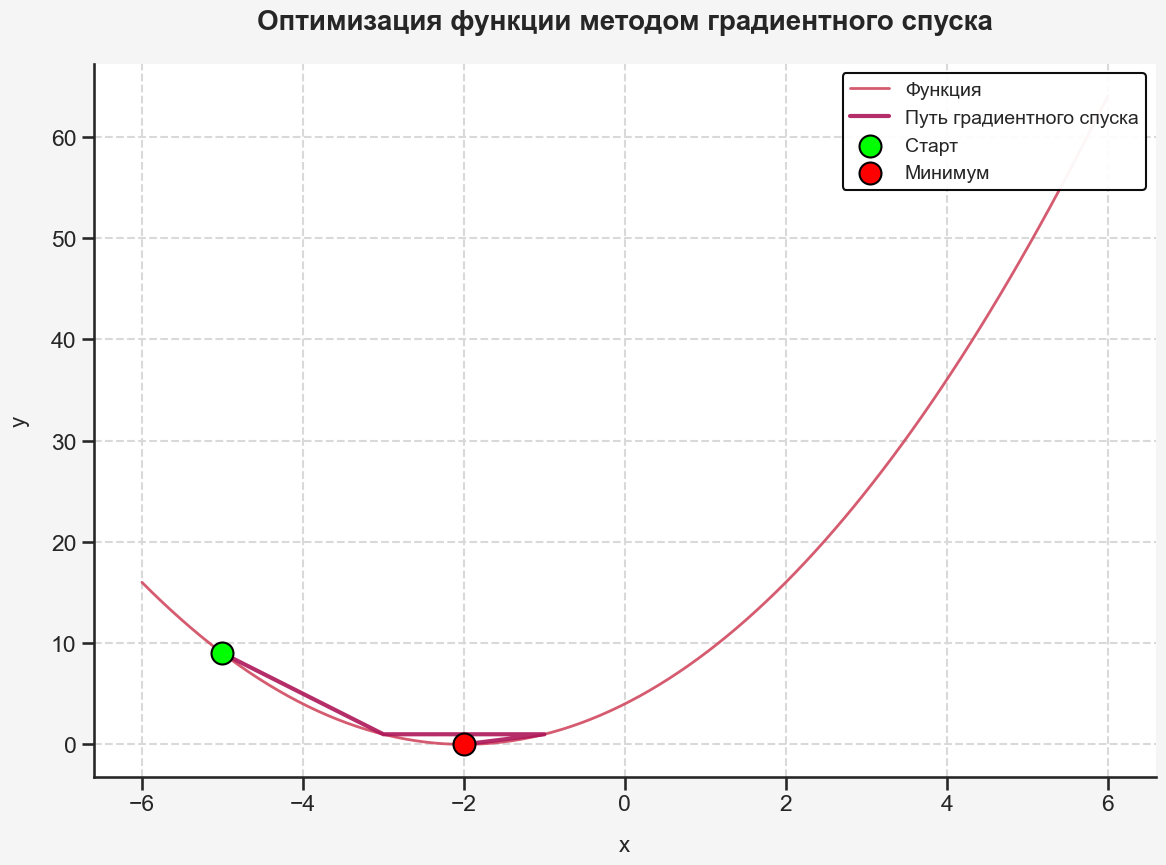

In [67]:
# Пример использования 1d
descent_1d = DummyGradientDecent(is_1d=True)
painter_1d = GraphicsPainter(descent_1d)
painter_1d.plot()

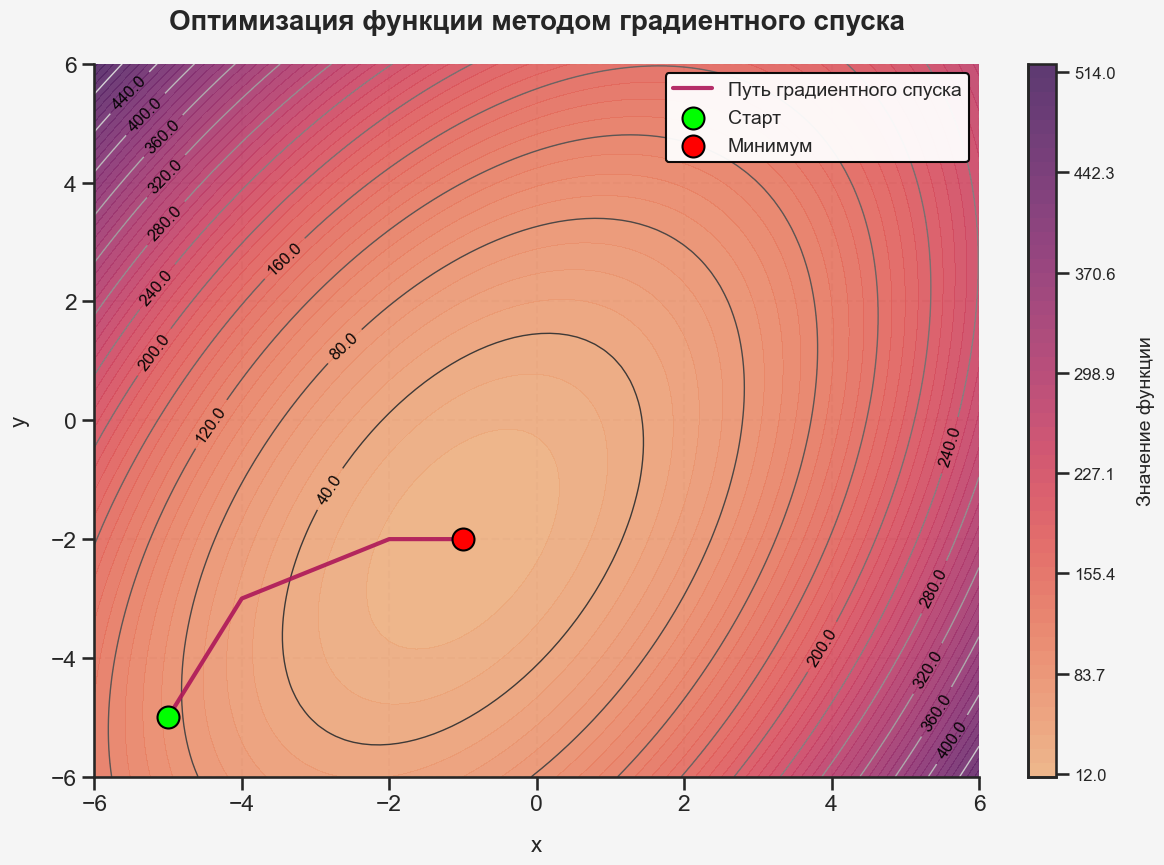

In [68]:
# Пример использования 2d
descent_2d = DummyGradientDecent(is_1d=False)
painter_2d = GraphicsPainter(descent_2d)
painter_2d.plot()

31.979505051998302


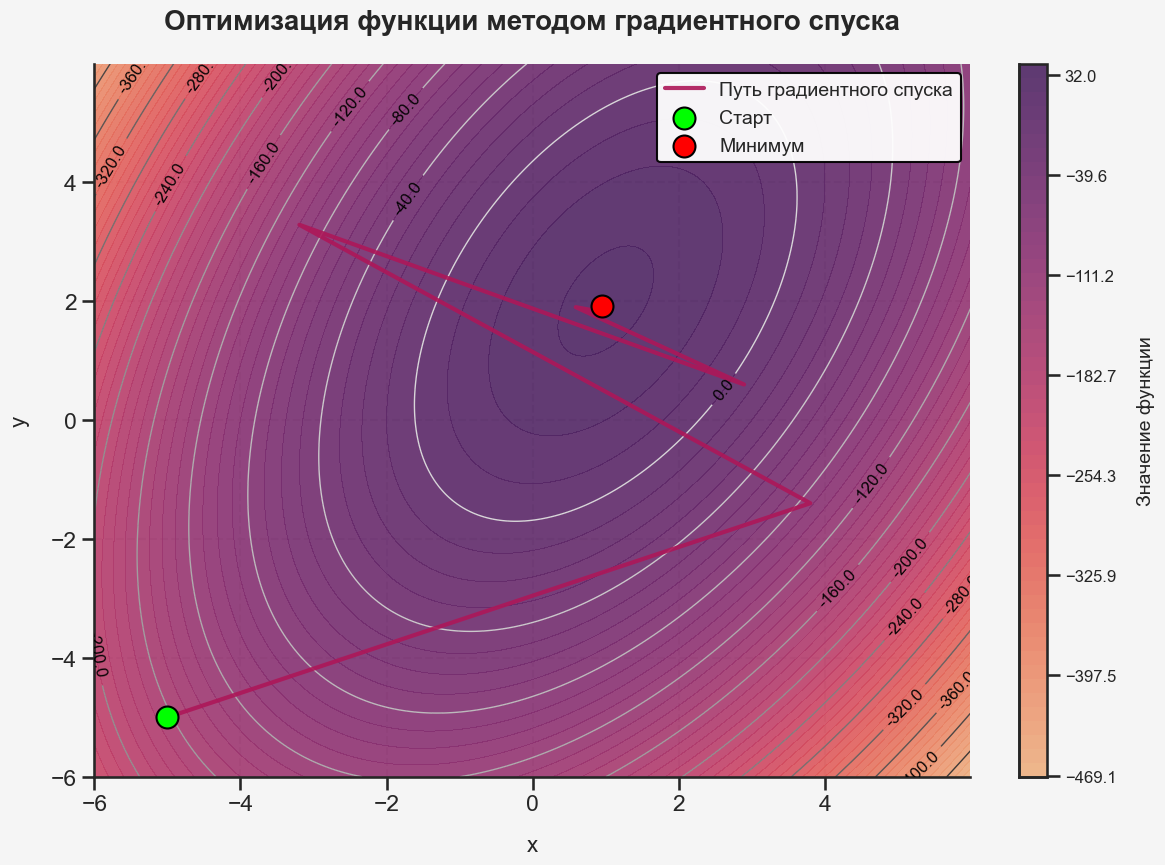

In [8]:
# from gradient_decent import GradientDecent
from lrs import exponential_decay, constant, polynomial_decay
import math

func = lambda x: -6 * x[0]**2 + 4 * x[0] * x[1] - 3 * x[1]**2 + 4 * (x[0] + 2 * x[1]) + 22
test_descent = GradientDecent(exponential_decay(0.2, 0.3), func, [[-6.0, 6.0], [-6.0, 6.0]], 0.00001)
test_painter = GraphicsPainter(test_descent)

print(test_descent.find_max([-5, -5], 10000))
# print(test_descent.get_path())

test_painter.plot()